# Team 4 - TED Talks

![](https://psmarketingimages.s3.amazonaws.com/blog/wp-content/uploads/2017/04/23103819/TED-Talks-for-Small-Business-and-Entrepreneurs.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/rounakbanik/ted-talks)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- The `ratings` column is in dictionary format. How should we handle them?
- Same for `related_talks` and `tags` column
- Can you find the `year` of the talks?
- And more...

In [93]:
# Start your codes here!
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timezone
import json

In [94]:
ted = pd.read_csv('./ted.csv')
ted.sample(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
1267,104,In the fall of 2011 Peter Norvig taught a clas...,371,TED2012,1330387200,38,Peter Norvig,"Peter Norvig: The 100,000-student classroom",1,1340292861,"[{'id': 10, 'name': 'Inspiring', 'count': 305}...","[{'id': 1090, 'hero': 'https://pe.tedcdn.com/i...",Computer scientist,"['Internet', 'computers', 'education', 'global...","The 100,000-student classroom",https://www.ted.com/talks/peter_norvig_the_100...,1054590
636,164,"Sugar pills, injections of nothing -- studies ...",545,TEDMED 2009,1255132800,33,Eric Mead,Eric Mead: The magic of the placebo,1,1268384460,"[{'id': 2, 'name': 'Confusing', 'count': 141},...","[{'id': 199, 'hero': 'https://pe.tedcdn.com/im...",Magician,"['entertainment', 'illusion', 'magic', 'medici...",The magic of the placebo,https://www.ted.com/talks/eric_mead_the_magic_...,1022426
501,428,Eric Giler wants to untangle our wired lives w...,609,TEDGlobal 2009,1248307200,27,Eric Giler,Eric Giler: A demo of wireless electricity,1,1251190740,"[{'id': 8, 'name': 'Informative', 'count': 491...","[{'id': 512, 'hero': 'https://pe.tedcdn.com/im...",Wireless electrician,"['engineering', 'entrepreneur', 'future', 'inf...",A demo of wireless electricity,https://www.ted.com/talks/eric_giler_demos_wir...,2088983
2268,28,Vanessa Ruiz takes us on an illustrated journe...,682,TEDMED 2015,1447804800,22,Vanessa Ruiz,Vanessa Ruiz: The spellbinding art of human an...,1,1472224914,"[{'id': 1, 'name': 'Beautiful', 'count': 283},...","[{'id': 2519, 'hero': 'https://pe.tedcdn.com/i...",Anatomical artist,"['Human body', 'TEDMED', 'art', 'beauty', 'cre...",The spellbinding art of human anatomy,https://www.ted.com/talks/vanessa_ruiz_the_spe...,1257468
1290,89,"Over the years, research has shown a counterin...",587,TEDxStanford,1337385600,27,Baba Shiv,Baba Shiv: Sometimes it's good to give up the ...,1,1342623575,"[{'id': 8, 'name': 'Informative', 'count': 128...","[{'id': 93, 'hero': 'https://pe.tedcdn.com/ima...",Neuroeconomist,"['TEDx', 'business', 'cancer', 'choice', 'deci...",Sometimes it's good to give up the driver's seat,https://www.ted.com/talks/baba_shiv_sometimes_...,850833


In [95]:
ted.info()
#Dữ liệu cũng khá là sạch :D

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


In [96]:
#Kiểm tra thấy cột film_date không có dữ liệu null, tiến hành trích year từ các giá trị trong cột
# year = [datetime.fromtimestamp(ted['film_date'].iloc[i], timezone.utc).year for i in range(len(ted))]
ted['film_date'] = ted['film_date'].apply(lambda x: pd.to_datetime(x, unit='s'))
ted['published_date'] = ted['published_date'].apply(lambda x: pd.to_datetime(x, unit='s'))
#Chuyển đổi từ timestamp sang dạng datetime
#Chèn thêm cột year vào dữ liệu
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [97]:
import ast
rating_set = {}
for i in range(len(ted)):
    ratings = ast.literal_eval(ted['ratings'].iloc[i])
#     if len(ratings) != 14:
#         print('a')
    for rate in ratings:
        rating_set.update({rate['id']: rate['name']})
print(rating_set)
#Tự định nghĩa rating có id 2, 11, 21, 26 sẽ là những rating tiêu cực nên sẽ gán giá trị âm. Rating cuối sẽ là tổng giữa
#rating tích cực trừ rating tiêu cực.

def final_rating(rating_object):
    ratings = ast.literal_eval(rating_object)
    final = 0
    for rate in ratings:
        if rate['id'] in [2, 11, 21, 26]:
            final -= rate['count']
        else:
            final += rate['count']
    return final
ted['final_ratings'] = ted['ratings'].apply(final_rating)
ted.head()

{7: 'Funny', 1: 'Beautiful', 9: 'Ingenious', 3: 'Courageous', 11: 'Longwinded', 2: 'Confusing', 8: 'Informative', 22: 'Fascinating', 21: 'Unconvincing', 24: 'Persuasive', 23: 'Jaw-dropping', 25: 'OK', 26: 'Obnoxious', 10: 'Inspiring'}


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,final_ratings
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,91574
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,1808
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2122
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,3416
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,25000


In [98]:
tag_list = []
for i in range(len(ted)):
    tags = ast.literal_eval(ted['tags'].iloc[i])
    tag_list += tags
tagDF = pd.DataFrame(tag_list, columns=['tag'])
#Liệt kê tất cả các tag có mặt, và thống kê tag nào được sử dụng nhiều nhất
tagDF['tag'].value_counts().nlargest(10)

technology       727
science          567
global issues    501
culture          486
TEDx             450
design           418
business         348
entertainment    299
health           236
innovation       229
Name: tag, dtype: int64

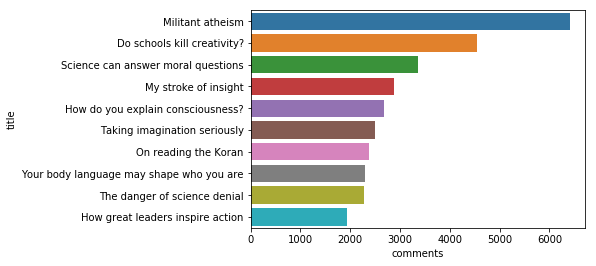

In [99]:
#Top 10 comment
top10comment = ted.sort_values(by='comments', ascending=False).head(10)
sns.barplot(x='comments', y='title', data=top10comment)

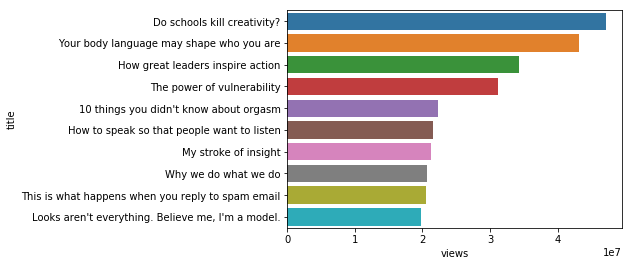

In [100]:
#Top 10 view
top10view = ted.sort_values(by='views', ascending=False).head(10)
sns.barplot(x='views', y='title', data=top10view)

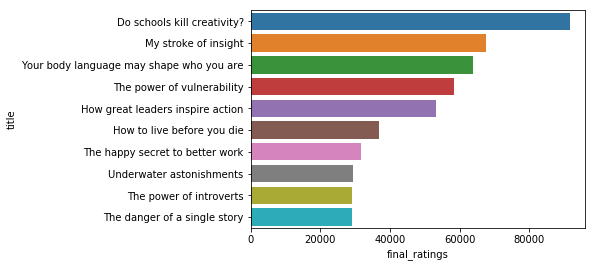

In [101]:
#Top 10 rating
top10rating = ted.sort_values(by='final_ratings', ascending=False).head(10)
sns.barplot(x='final_ratings', y='title', data=top10rating)

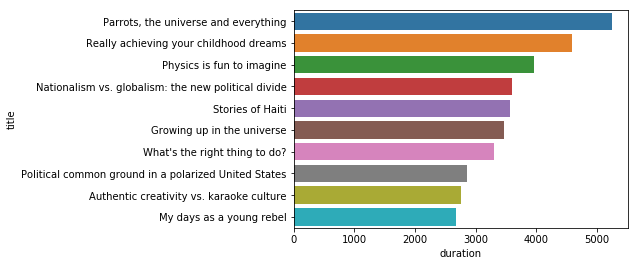

In [102]:
#Top 10 duration
top10duration = ted.sort_values(by='duration', ascending=False).head(10)
sns.barplot(x='duration', y='title', data=top10duration)

C:\Users\anhda\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


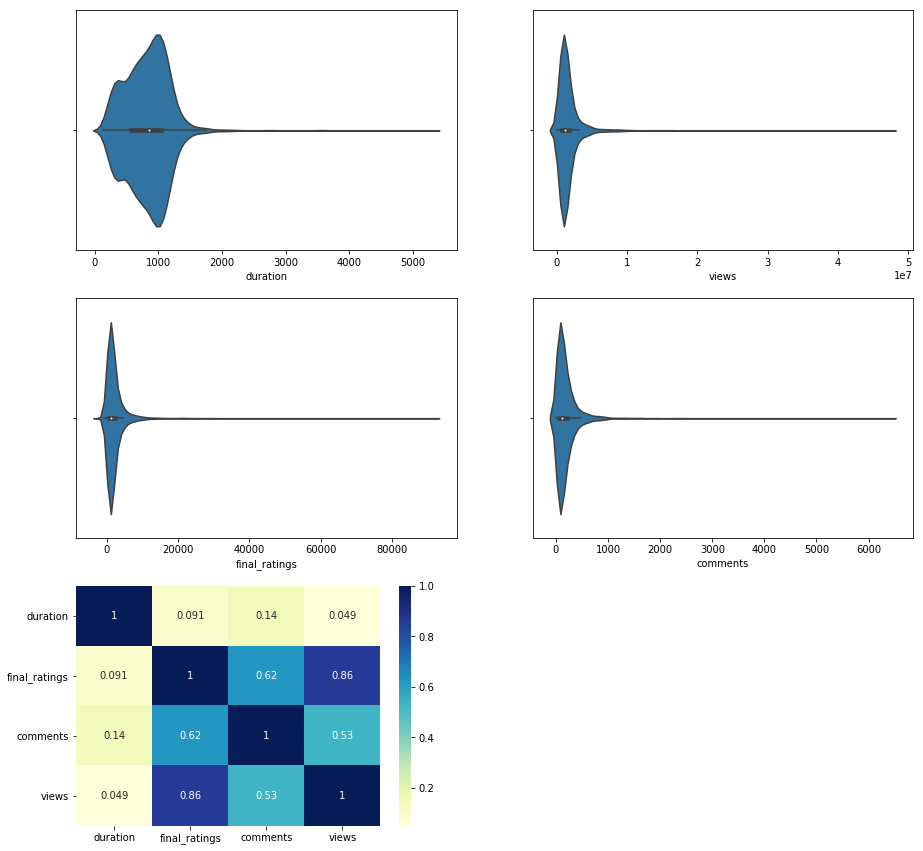

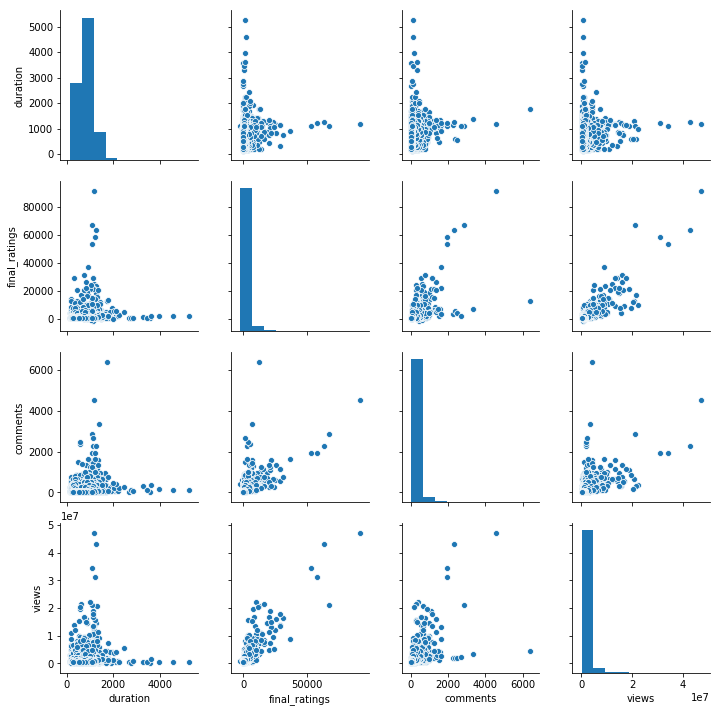

In [103]:
#Finding correlation among duration - views - final_ratings - comments
f, axes = plt.subplots(3, 2,  figsize=(15, 15))
sns.violinplot(x=ted['duration'], ax=axes[0, 0])
sns.violinplot(x=ted['views'], ax=axes[0, 1])
sns.violinplot(x=ted['final_ratings'], ax=axes[1, 0])
sns.violinplot(x=ted['comments'], ax=axes[1, 1])
sns.heatmap(ted[['duration', 'final_ratings', 'comments', 'views']].corr(), cmap="YlGnBu", annot=True, ax=axes[2, 0])
axes[2, 1].remove()
sns.pairplot(ted[['duration', 'final_ratings', 'comments', 'views']])
#Quan sát thấy, thời lượng không ảnh hưởng đến số lượt xem, đánh giá, bình luận
#Số điểm đánh giá có quan hệ cao với sô lượt xem
#Số lượt bình luận cũng tăng tuyến tính với số lượt xem.

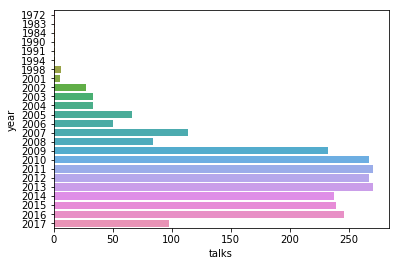

In [104]:
#talk_per_year
talk_per_year = ted['film_date'].map(lambda x: x.year).value_counts().reset_index()
talk_per_year.columns = ['year', 'talks']
sns.barplot(x='talks', y='year', data=talk_per_year, orient='h')
#Từ năm 2009 TED Talk trở nên phổ biến hơn, được tổ chức diễn thuyết nhiều hơn (năm 2017 có lẽ chưa đầy đủ số liệu)

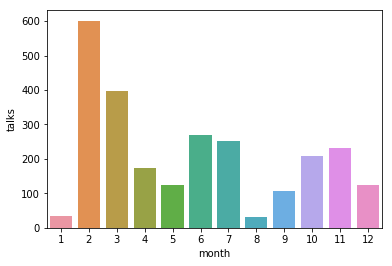

In [105]:
#talk_per_month
talk_per_month = ted['film_date'].map(lambda x: x.month).value_counts().reset_index()
talk_per_month.columns = ['month', 'talks']
sns.barplot(x='month', y='talks', data=talk_per_month)
#Thời điểm diễn ra cao điểm nhất là vào tháng 2, 3
#Ngoài ra ở những tháng như 6, 7 hoặc 10, 11 cũng có số lượng nhiều hơn, có lẽ nhằm vào những hội nghị, hội đàm.